In [ ]:
"""
CodeAlpha Internship – Task 1: Iris Flower Classification

This project is part of the Data Science Internship offered by CodeAlpha.
The goal of the task is to build a machine learning model that classifies iris flowers 
into one of three species: Setosa, Versicolor, or Virginica.

The steps followed in this project:
1. Load and explore the dataset
2. Visualize relationships between features
3. Split the data into training and testing sets
4. Train a classification model using Random Forest
5. Evaluate the model's accuracy
6. Display results using a confusion matrix

Tools used:
- Python
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
"""


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load and explore the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\Iris.csv")  
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop the ID column (not useful for training)
df.drop('Id', axis=1, inplace=True)
# Convert flower names to numeric values using Label Encoding
le = LabelEncoder()
df['target'] = le.fit_transform(df['Species'])  # Setosa → 0, Versicolor → 1, Virginica → 2
# Show the first few rows after encoding
print("\nData after encoding the 'Species' column:")
df.head()


Data after encoding the 'Species' column:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


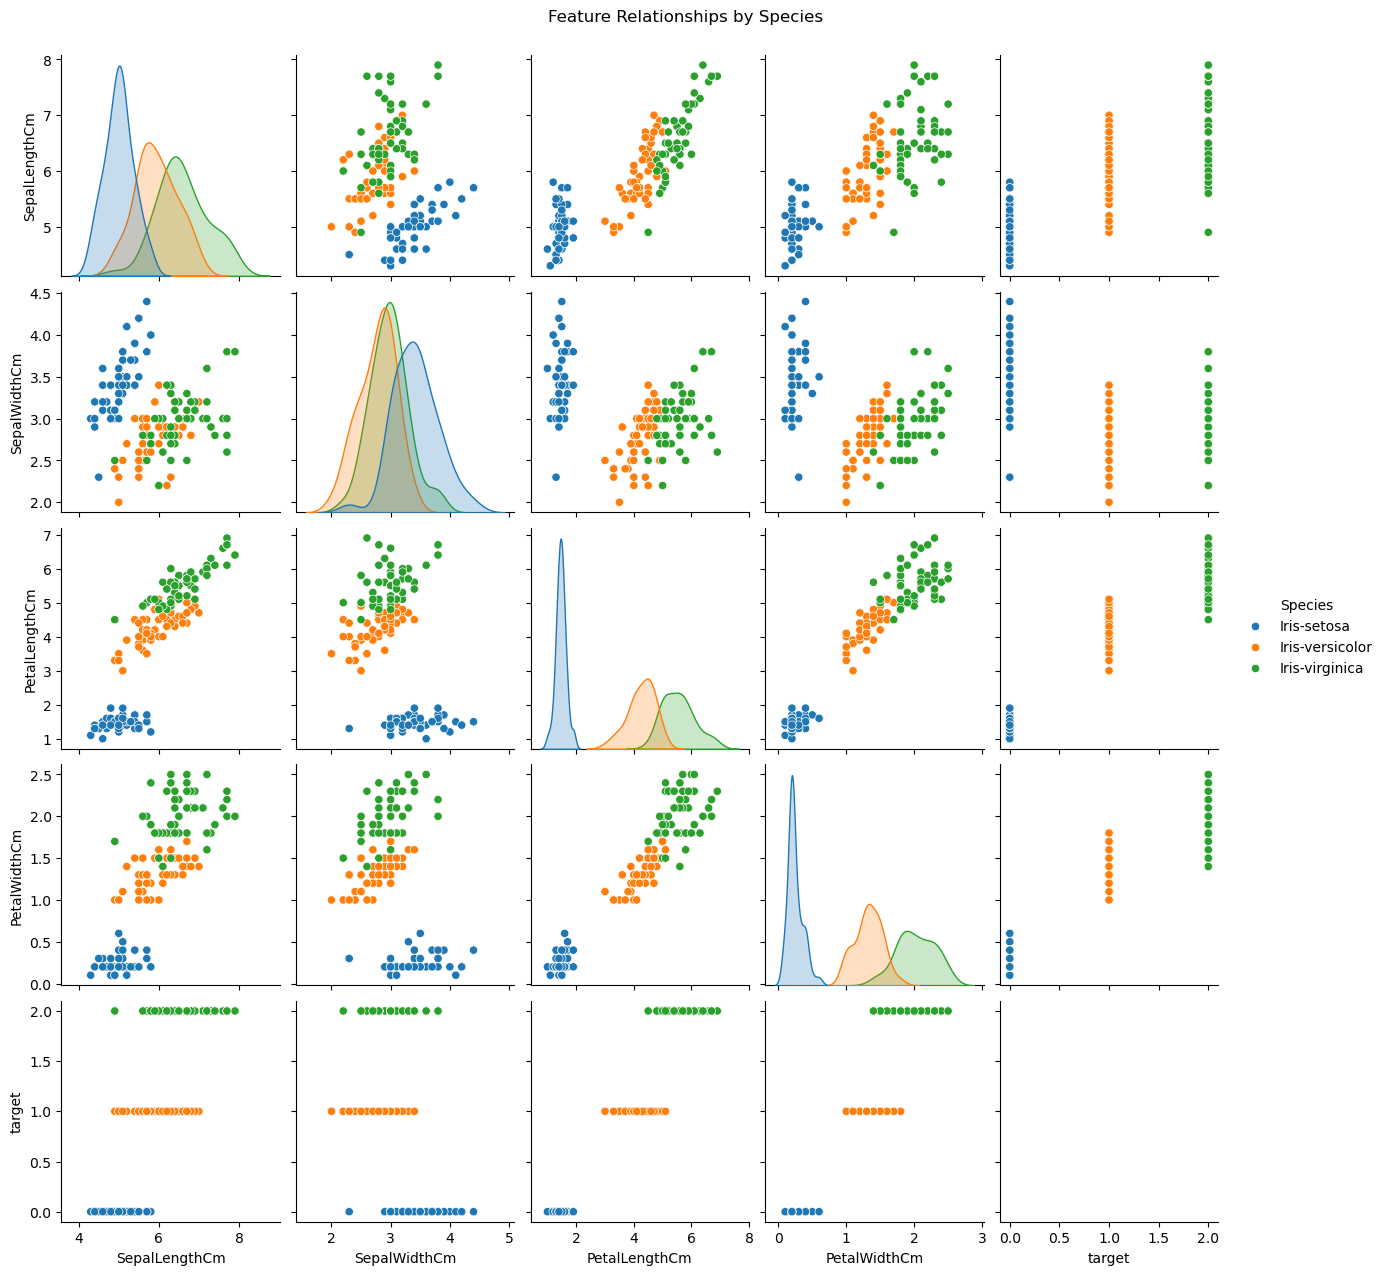

In [4]:
#2. Visualize relationships between features
sns.pairplot(df, hue='Species')  # Shows how features differ by species
plt.suptitle("Feature Relationships by Species", y=1.02)
plt.show()

In [5]:
#3. Split the data into training and testing sets
# Features (inputs)
X = df.drop(['Species', 'target'], axis=1)
# Target (output labels)
y = df['target']
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#4. Train a classification model using Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
#5. Evaluate the model's accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0


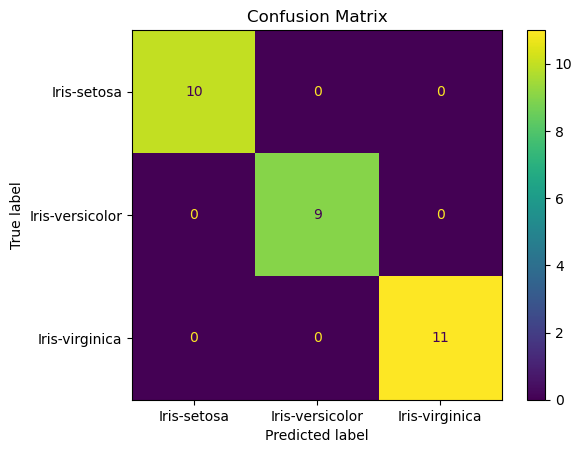

In [8]:
#6. Display results using a confusion matrix
CM = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()